# ***Creating DataFrame***

In [68]:
print('Credit Card Fraud Detection Using Machine Learning')

Credit Card Fraud Detection Using Machine Learning


In [69]:
#Starting by importing the Pandas library for data manipulation
import pandas as pd

In [70]:
#Creating a variable called 'data frame' and loading my dataset into this variable
data_frame = pd.read_csv('/content/drive/MyDrive/card_transdata.csv')

In [71]:
#displaying the first five rows of the dataset
data_frame.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [72]:
#renaming the column headers
#using inplace=True so these changes apply to the original dataset
#axis=1 because the columns are being renamed
data_frame.rename({'distance_from_home':"home_distance",'distance_from_last_transaction':"last_transaction_distance", 'ratio_to_median_purchase_price':"price_ratio",'repeat_retailer':"is_repeat",'used_chip':"card_used",'used_pin_number':"pin_used",}, axis=1, inplace=True)
data_frame.head()

,home_distance,last_transaction_distance,price_ratio,is_repeat,card_used,pin_used,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [73]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   home_distance              1000000 non-null  float64
 1   last_transaction_distance  1000000 non-null  float64
 2   price_ratio                1000000 non-null  float64
 3   is_repeat                  1000000 non-null  float64
 4   card_used                  1000000 non-null  float64
 5   pin_used                   1000000 non-null  float64
 6   online_order               1000000 non-null  float64
 7   fraud                      1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [74]:
#changing the types of the columns that represent binary data. These would be changed to integers as they should be whole numbers
data_frame = data_frame.astype({'is_repeat':'int64','card_used':'int64','pin_used':'int64','online_order':'int64','fraud':'int64'})
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   home_distance              1000000 non-null  float64
 1   last_transaction_distance  1000000 non-null  float64
 2   price_ratio                1000000 non-null  float64
 3   is_repeat                  1000000 non-null  int64  
 4   card_used                  1000000 non-null  int64  
 5   pin_used                   1000000 non-null  int64  
 6   online_order               1000000 non-null  int64  
 7   fraud                      1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


In [75]:
#to confirm the number of missing values in each column
print(data_frame.isnull().sum())


home_distance                0
last_transaction_distance    0
price_ratio                  0
is_repeat                    0
card_used                    0
pin_used                     0
online_order                 0
fraud                        0
dtype: int64


In [76]:
#using the describe function to output descriptive statistics
data_frame.describe()

,home_distance,last_transaction_distance,price_ratio,is_repeat,card_used,pin_used,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
#installing and importing these libraries in order to create visualisations
!pip install matplotlib pandas numpy
import matplotlib.pyplot as plt
import numpy as np

# ***Histograms***

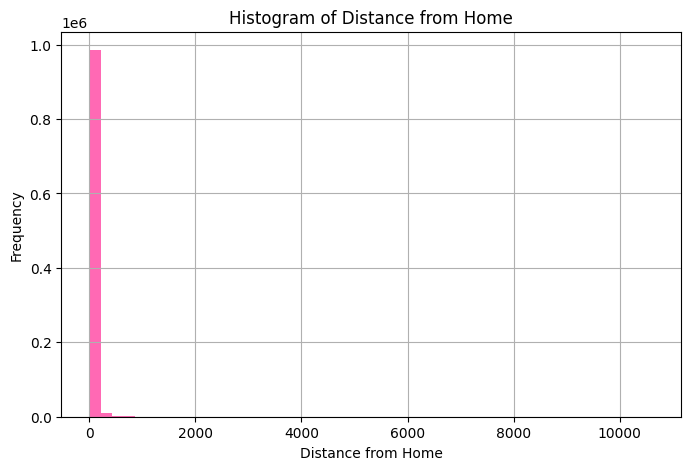

In [78]:
#creating a histogram of home_distance column
plt.figure(figsize=(8, 5)) #setting the size of the histogram
plt.hist(data_frame['home_distance'], bins=50, color='hotpink')
plt.title("Histogram of Distance from Home")
plt.xlabel("Distance from Home")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

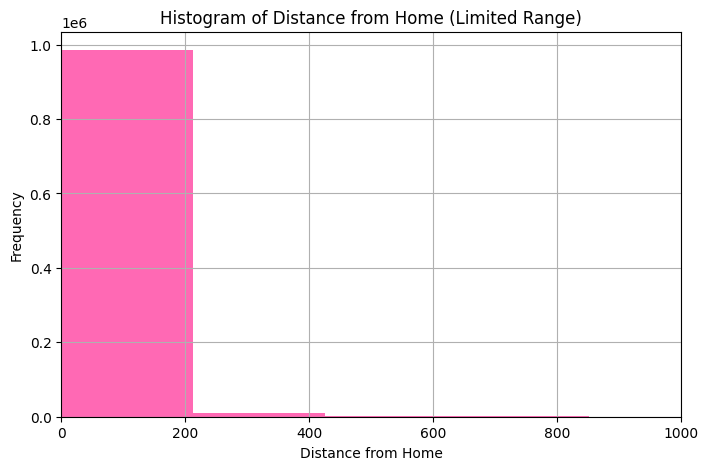

In [79]:
#limiting the range of the data to 1000 to show the positive skew in the data more effectively. (kind of zooming into it)
plt.figure(figsize=(8, 5))
plt.hist(data_frame['home_distance'], bins=50, color='hotpink')
plt.xlim([0, 1000])  # Limit x-axis to 0-100
plt.title("Histogram of Distance from Home (Limited Range)")
plt.xlabel("Distance from Home")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


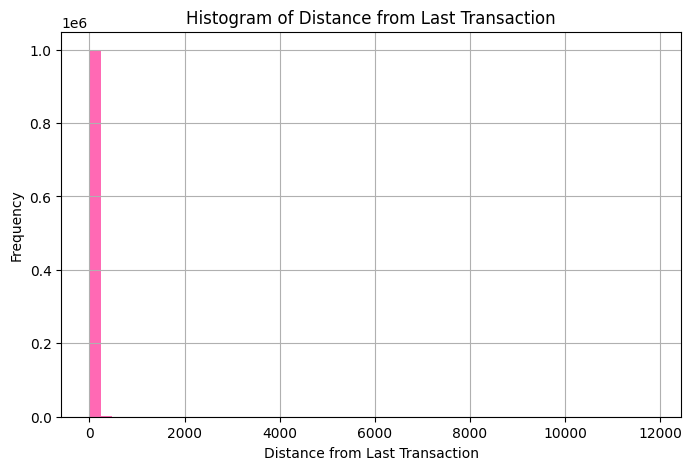

In [80]:
#creating a histogram of last_transaction_distance column
plt.figure(figsize=(8, 5))
plt.hist(data_frame['last_transaction_distance'], bins=50, color='hotpink')
plt.title("Histogram of Distance from Last Transaction")
plt.xlabel("Distance from Last Transaction")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

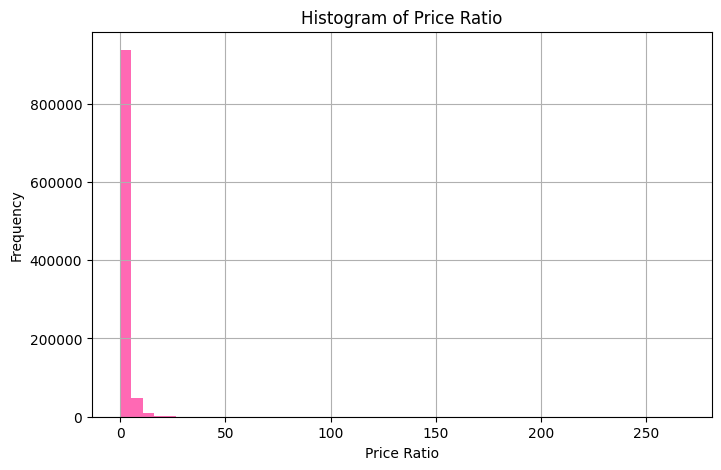

In [81]:
#creating a histogram of price_ratio column
plt.figure(figsize=(8, 5))
plt.hist(data_frame['price_ratio'], bins=50, color='hotpink')
plt.title("Histogram of Price Ratio")
plt.xlabel("Price Ratio")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# ***Boxplots***

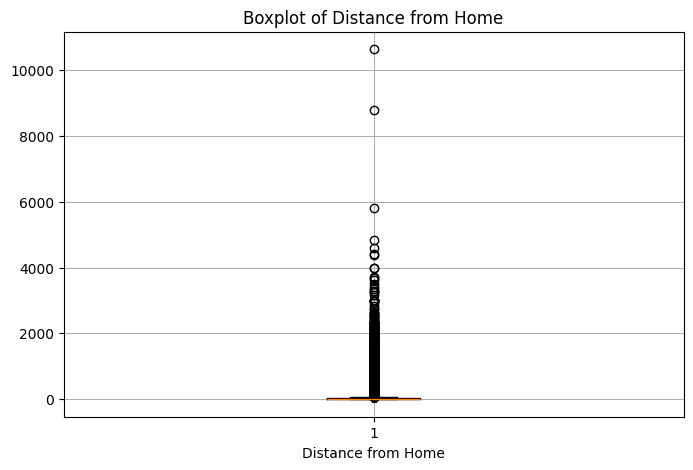

In [82]:
#creating a boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(data_frame['home_distance'])
plt.title("Boxplot of Distance from Home")
plt.xlabel("Distance from Home")
plt.grid(True)
plt.show()

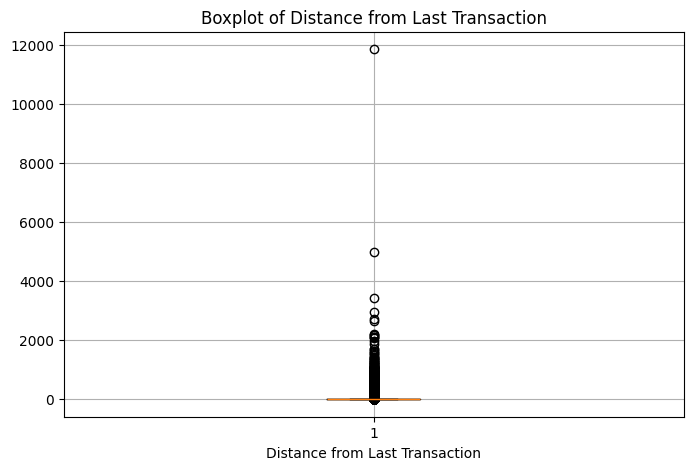

In [83]:
#creating a boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(data_frame['last_transaction_distance'])
plt.title("Boxplot of Distance from Last Transaction")
plt.xlabel("Distance from Last Transaction")
plt.grid(True)
plt.show()

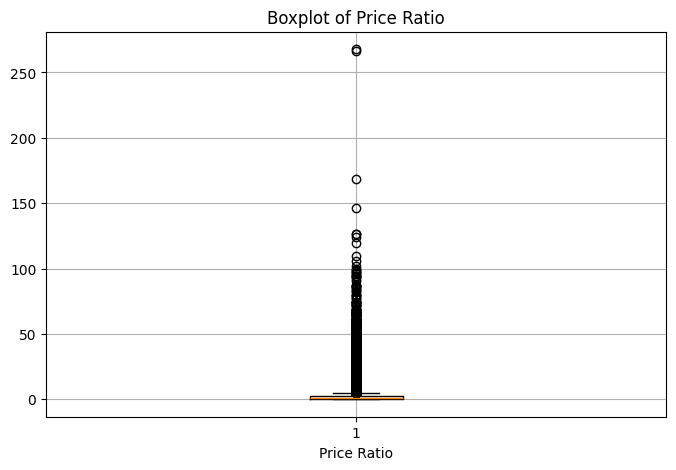

In [84]:
plt.figure(figsize=(8, 5))
plt.boxplot(data_frame['price_ratio'])
plt.title("Boxplot of Price Ratio")
plt.xlabel("Price Ratio")
plt.grid(True)
plt.show()

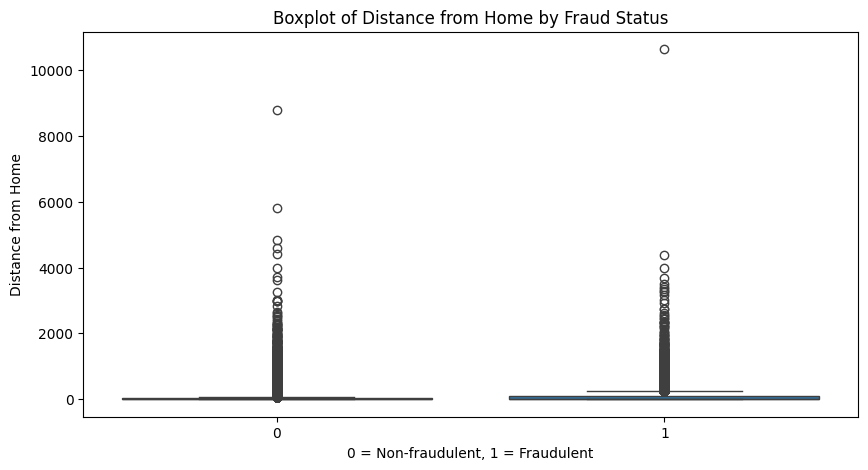

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x=data_frame['fraud'], y=data_frame['home_distance'])
plt.title("Boxplot of Distance from Home by Fraud Status")
plt.xlabel("0 = Non-fraudulent, 1 = Fraudulent")
plt.ylabel("Distance from Home")
plt.show()


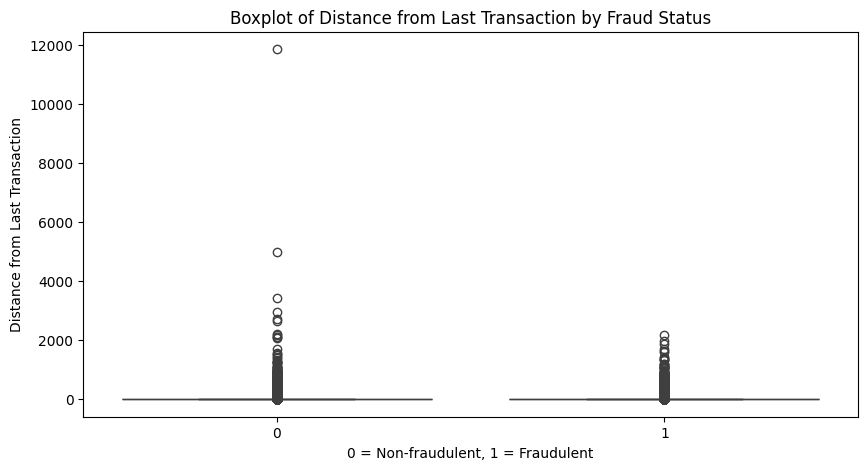

In [86]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_frame['fraud'], y=data_frame['last_transaction_distance'])
plt.title("Boxplot of Distance from Last Transaction by Fraud Status")
plt.xlabel("0 = Non-fraudulent, 1 = Fraudulent")
plt.ylabel("Distance from Last Transaction")
plt.show()

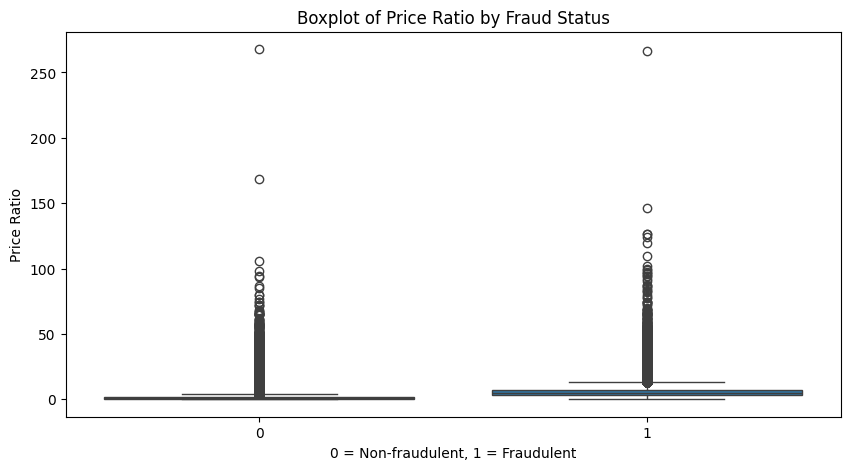

In [87]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_frame['fraud'], y=data_frame['price_ratio'])
plt.title("Boxplot of Price Ratio by Fraud Status")
plt.xlabel("0 = Non-fraudulent, 1 = Fraudulent")
plt.ylabel("Price Ratio")
plt.show()

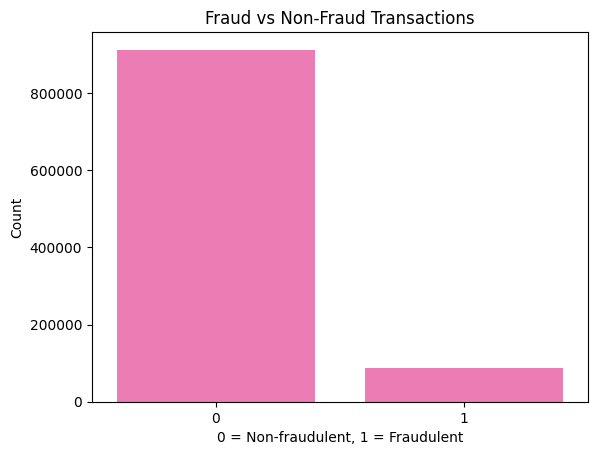

In [88]:
sns.countplot(x='fraud', data=data_frame, color='hotpink')
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("0 = Non-fraudulent, 1 = Fraudulent")
plt.ylabel("Count")
plt.show()

In [89]:
#fraud_percentage = data_frame['fraud'].sum()/len(data_frame)*100
print(f"Fraud percentage: {(data_frame['fraud'].sum()/len(data_frame)*100)}%")

Fraud percentage: 8.7403%


#***Scaling***

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [91]:
#splitting the data into features and target variable
#this drops the fraud column leaving us with the rest of the columns which are the 'features'
x = data_frame.drop(['fraud'], axis = 1)
#the target is the fraud column which is saved as (y)
y = data_frame['fraud']

In [92]:
#80% of dataset will be used for model training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [93]:
#features need to be scaled to avoid the error: STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [94]:
#saving the scaler to be used in deployment
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

#***SMOTE Oversampling***

In [95]:
from imblearn.over_sampling import SMOTE

In [96]:
#applying SMOTE on training scaled data
smote = SMOTE(random_state=42)
x_train_oversampled, y_train_oversampled = smote.fit_resample(x_train_scaled, y_train)

#***Implementing Models after Oversampling***

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [98]:
#initiate the models
model_lr = LogisticRegression()
model_nb = GaussianNB()
model_dt = DecisionTreeClassifier()

In [99]:
#train and fit the models
# Logistic Regression
model_lr.fit(x_train_oversampled, y_train_oversampled)

LogisticRegression()

In [100]:
# Naive Bayes
model_nb.fit(x_train_oversampled, y_train_oversampled)

GaussianNB()

In [101]:
# Decision Trees
model_dt.fit(x_train_oversampled, y_train_oversampled)

DecisionTreeClassifier()

In [102]:
#making predictions on the test set
y_predict_lr = model_lr.predict(x_test_scaled)
y_predict_nb = model_nb.predict(x_test_scaled)
y_predict_dt = model_dt.predict(x_test_scaled)

# ***Evaluation Metrics of Models After Oversampling***

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, classification_report

In [104]:
x_test.shape

(200000, 7)

In [105]:
x_train.shape

(800000, 7)

# ***Logistic Regression Results (Oversampled)***

In [106]:
print("lr report\n", classification_report(y_test, y_predict_lr))

lr report
               precision    recall  f1-score   support

           0       1.00      0.93      0.96    182557
           1       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



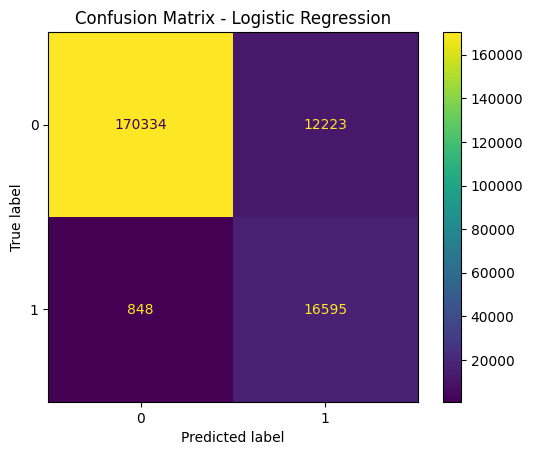

In [107]:
lr_cm=confusion_matrix(y_test, y_predict_lr, labels=model_lr.classes_)
disp=ConfusionMatrixDisplay(lr_cm, display_labels=model_lr.classes_)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


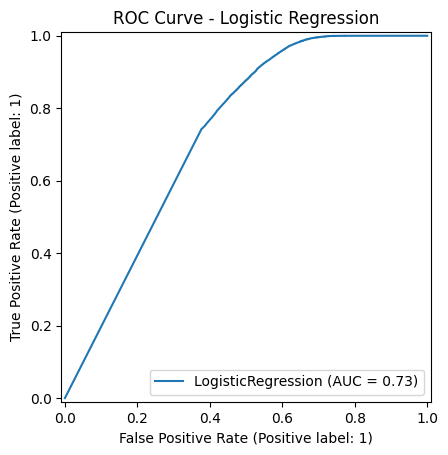

In [108]:
lr_AUC=RocCurveDisplay.from_estimator(model_lr, x_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

# ***Naive Baiyes Results (Oversampled)***

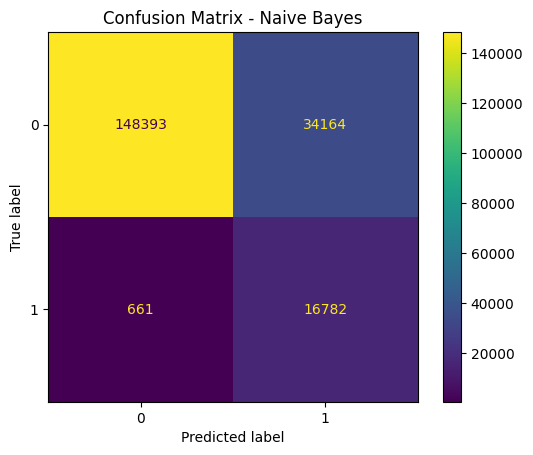

In [109]:
nb_cm=confusion_matrix(y_test, y_predict_nb, labels=model_nb.classes_)
disp=ConfusionMatrixDisplay(nb_cm, display_labels=model_nb.classes_)
disp.plot()
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

In [110]:
print("Nb report\n", classification_report(y_test, y_predict_nb))

Nb report
               precision    recall  f1-score   support

           0       1.00      0.81      0.89    182557
           1       0.33      0.96      0.49     17443

    accuracy                           0.83    200000
   macro avg       0.66      0.89      0.69    200000
weighted avg       0.94      0.83      0.86    200000



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


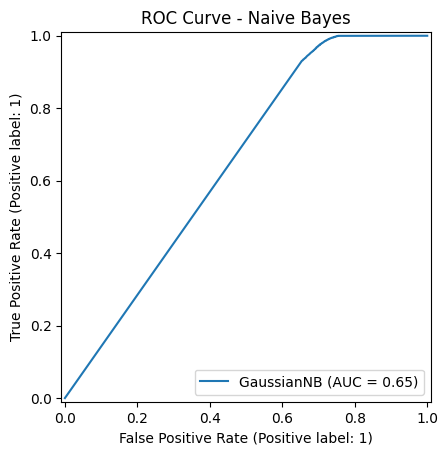

In [111]:
nb_AUC=RocCurveDisplay.from_estimator(model_nb, x_test, y_test)
plt.title("ROC Curve - Naive Bayes")
plt.show()

# ***Decision Tree Results (Oversampled)***

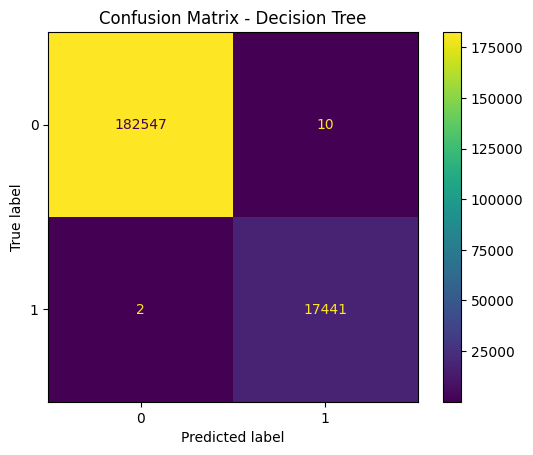

In [112]:
dt_cm=confusion_matrix(y_test, y_predict_dt, labels=model_dt.classes_)
disp=ConfusionMatrixDisplay(dt_cm, display_labels=model_dt.classes_)
disp.plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [113]:
print("Dt report\n", classification_report(y_test, y_predict_dt))

Dt report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    182557
           1       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


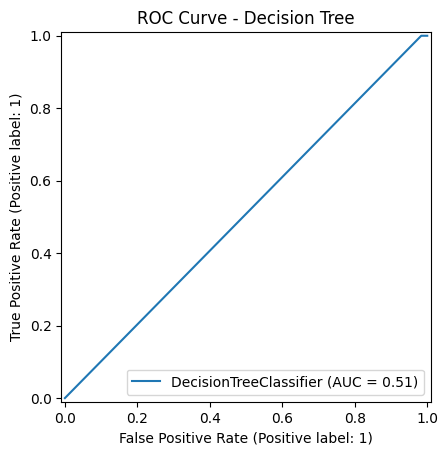

In [114]:
dt_AUC=RocCurveDisplay.from_estimator(model_dt, x_test, y_test)
plt.title("ROC Curve - Decision Tree")
plt.show()

#***Random Undersampling***

https://medium.com/@daniele.santiago/balancing-imbalanced-data-undersampling-and-oversampling-techniques-in-python-7c5378282290

In [115]:
from imblearn.under_sampling import RandomUnderSampler

In [116]:
# applying Random Undersampling on the training scaled data
rus = RandomUnderSampler(random_state=42)
x_train_undersampled, y_train_undersampled = rus.fit_resample(x_train_scaled, y_train)

#***Implementing Models After Undersampling***

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [118]:
#initiate the models
model_lr_under = LogisticRegression()
model_nb = GaussianNB()
model_dt = DecisionTreeClassifier()

In [119]:
#train and fit the models
# Logistic Regression
model_lr_under.fit(x_train_undersampled, y_train_undersampled)

LogisticRegression()

In [120]:
# saving the logistic regression model on undersampled data for deployment
joblib.dump(model_lr_under, 'fraud_model.pkl')

['fraud_model.pkl']

In [121]:
# Naive Bayes
model_nb.fit(x_train_undersampled, y_train_undersampled)

GaussianNB()

In [122]:
# Decision Trees
model_dt.fit(x_train_undersampled, y_train_undersampled)

DecisionTreeClassifier()

In [123]:
#making predictions on the test set
y_predict_lr = model_lr_under.predict(x_test_scaled)
y_predict_nb = model_nb.predict(x_test_scaled)
y_predict_dt = model_dt.predict(x_test_scaled)

# ***Evaluation Metrics of Models After Undersampling***

In [124]:
x_test.shape

(200000, 7)

In [125]:
x_train.shape

(800000, 7)

# ***Logistic Regression Results (Undersampled)***

In [126]:
print("lr report\n", classification_report(y_test, y_predict_lr))

lr report
               precision    recall  f1-score   support

           0       1.00      0.93      0.96    182557
           1       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



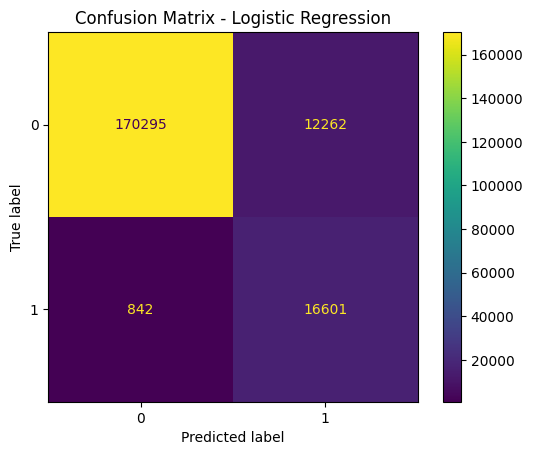

In [127]:
lr_cm=confusion_matrix(y_test, y_predict_lr, labels=model_lr_under.classes_)
disp=ConfusionMatrixDisplay(lr_cm, display_labels=model_lr_under.classes_)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


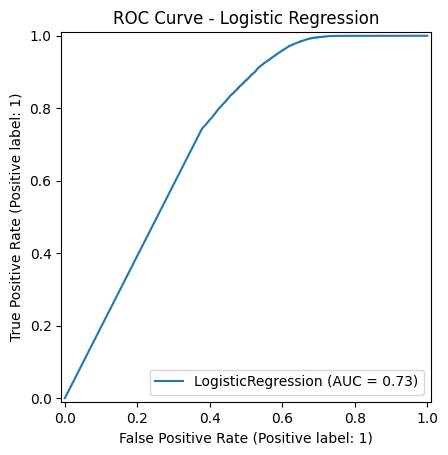

In [128]:
lr_AUC=RocCurveDisplay.from_estimator(model_lr_under, x_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

# ***Naive Baiyes Results (Undersampled)***

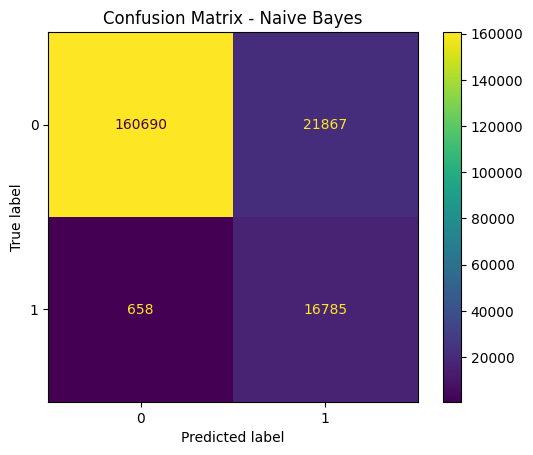

In [129]:
nb_cm=confusion_matrix(y_test, y_predict_nb, labels=model_nb.classes_)
disp=ConfusionMatrixDisplay(nb_cm, display_labels=model_nb.classes_)
disp.plot()
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

In [130]:
print("Nb report\n", classification_report(y_test, y_predict_nb))

Nb report
               precision    recall  f1-score   support

           0       1.00      0.88      0.93    182557
           1       0.43      0.96      0.60     17443

    accuracy                           0.89    200000
   macro avg       0.72      0.92      0.77    200000
weighted avg       0.95      0.89      0.91    200000



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


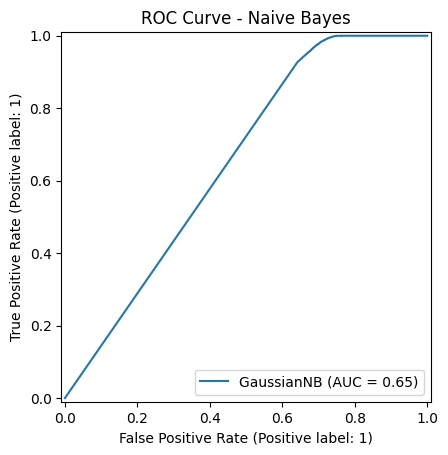

In [131]:
nb_AUC=RocCurveDisplay.from_estimator(model_nb, x_test, y_test)
plt.title("ROC Curve - Naive Bayes")
plt.show()

# ***Decision Tree Results (Undersampled)***

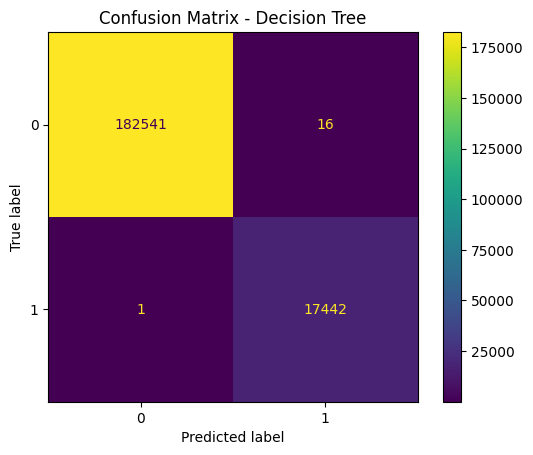

In [132]:
dt_cm=confusion_matrix(y_test, y_predict_dt, labels=model_dt.classes_)
disp=ConfusionMatrixDisplay(dt_cm, display_labels=model_dt.classes_)
disp.plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [133]:
print("Dt report\n", classification_report(y_test, y_predict_dt))

Dt report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    182557
           1       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


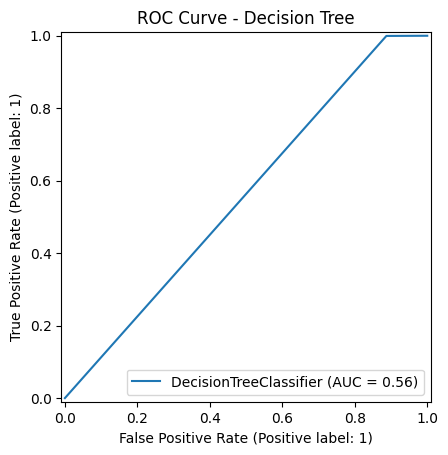

In [134]:
dt_AUC=RocCurveDisplay.from_estimator(model_dt, x_test, y_test)
plt.title("ROC Curve - Decision Tree")
plt.show()

In [135]:
#downloading files for deployment
from google.colab import files
files.download('fraud_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>